<a href="https://colab.research.google.com/github/tarod13/OptimalControl/blob/main/ControlOptimo_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! sudo apt-get install cm-super
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt-get install texlive-fonts-recommended 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lmodern fonts-noto-mono
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libkpathsea6 libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2
  libzzip-0-13 lmodern pfb2t1c2pfb poppler-data t1utils tex-common
  texlive-base texlive-binaries texlive-latex-base texlive-latex-recommended
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  cm-super cm-super-minimal fonts-droid-fallback fonts-lmodern fonts-noto-mono
  libcupsfilter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [ ]:
def estimate_J(x, xdot, t):
  J = (xdot**2 + 2*t*x).mean()
  return J

In [ ]:
final_times = [2, 2, 3.995, 1.312, 1.442]
labels = ['a)', 'b)', 'c-1)', 'c-2)', 'd)']
constants = [4.0/3.0, -2, -1.658, 2.762, -1.04]

t = {}
x = {}
xdot = {}
J = {}
for tf, label, C in zip(final_times, labels, constants):
  t[label] = np.linspace(0.0, tf, num=2000)
  x[label] = t[label]**3/6.0 + C*t[label] + 1
  xdot[label] = t[label]**2/2.0 + C  

for tf, label, C in zip(final_times, labels, constants):
  tt = np.linspace(0.0, tf, num=20000000)
  xx = tt**3/6.0 + C*tt + 1
  xxdot = tt**2/2.0 + C
  J[label] = estimate_J(xx, xxdot, tt)

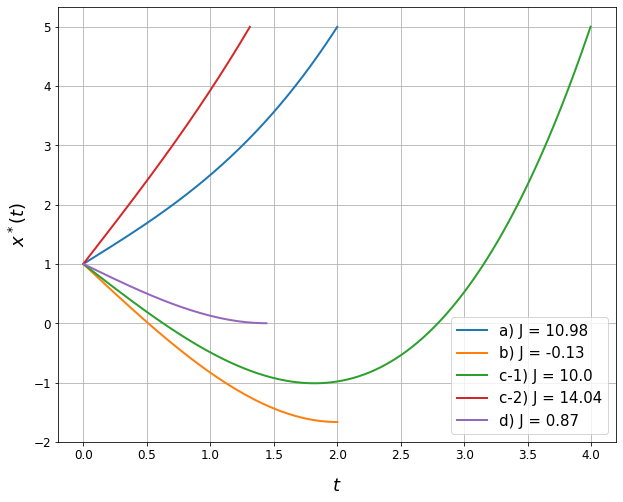

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
for label in labels:
  ax.plot(t[label], x[label], label=label + ' J = ' + str(np.round(J[label], 2)),
          linewidth=2)
plt.legend(fontsize=15)
plt.xlabel(r'$t$', fontsize=18,labelpad=15)
plt.ylabel(r'$x^*(t)$', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
plt.grid()
plt.savefig('ControlOpt_T1_solutions.pdf', bbox_inches = 'tight',
    pad_inches = 0)
plt.show()
plt.close()

In [ ]:
dx_max = 0.1

dx = {}
dxdot = {}
Jd = {}

for tf, label, C in zip(final_times, labels, constants):
  a = -4.0 * dx_max / tf**2
  b = -a * tf
  dx[label] = a*t[label]**2 + b*t[label]
  dxdot[label] = 2.0*a*t[label] + b
  Jd[label] = estimate_J(x[label] + dx[label], xdot[label] + dxdot[label], t[label])

for tf, label, C in zip(final_times, labels, constants):
  a = -4.0 * dx_max / tf**2
  b = -a * tf
  tt = np.linspace(0.0, tf, num=20000000)
  dxx = a*tt**2 + b*tt
  dxxdot = 2.0*a*tt + b
  xx = tt**3/6.0 + C*tt + 1
  xxdot = tt**2/2.0 + C
  Jd[label] = estimate_J(xx + dxx, xxdot + dxxdot, tt)

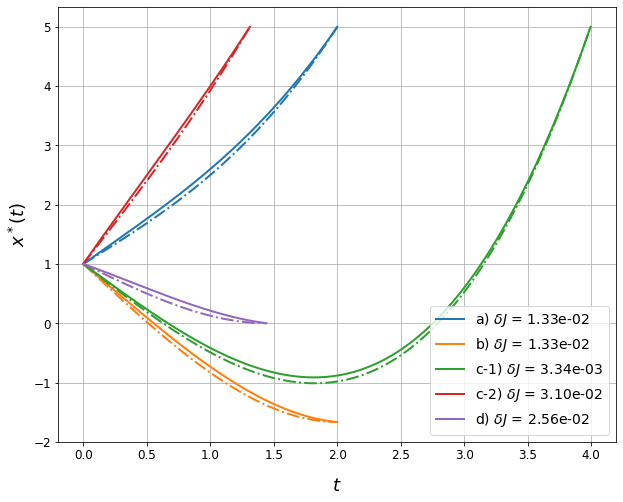

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
for i, label in enumerate(labels):
  ax.plot(t[label], x[label] + dx[label], label=label + r' $\delta J$' + ' = {:.2e}'.format(Jd[label]-J[label], 2),
          linewidth=2)
  ax.plot(t[label], x[label], linewidth=2, linestyle='-.', color='C'+str(i))
plt.legend(fontsize=14, loc='lower right')
plt.xlabel(r'$t$', fontsize=18,labelpad=15)
plt.ylabel(r'$x^*(t)$', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
plt.grid()
plt.savefig('ControlOpt_T1_variations.pdf', bbox_inches = 'tight',
    pad_inches = 0)
plt.show()
plt.close()